In [740]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

In [604]:
webstat = pd.read_csv('t1_webstat.csv')
train = pd.read_csv('train.csv'"")
test = pd.read_csv('test.csv')

In [605]:
webstat['date_time'] = pd.to_datetime(webstat['date_time'])
train['create_time'] = pd.to_datetime(train['create_time'])
test['create_time'] = pd.to_datetime(test['create_time'])

In [606]:
webstat = webstat.set_index('sessionkey_id')

In [607]:
webstat.convert_dtypes()
webstat['product_in_sale'] = webstat['product_in_sale'].astype(bool)
webstat['product_in_sale'] = webstat['product_in_sale'].astype(bool)
webstat['pageview_duration_sec'] = webstat['pageview_duration_sec'].astype(np.float32)
webstat['page_type'] = webstat['page_type'].astype(np.uint16)
webstat['pageview_number'] = webstat['pageview_number'].astype(np.uint16)
webstat['category_id'] = webstat['category_id'].astype("Int64")
webstat['good_id'] = webstat['good_id'].astype("Int64")
webstat['model_id'] = webstat['model_id'].astype("Int64")

In [608]:
webstat = webstat.loc[webstat['pageview_duration_sec'] > 0]

In [758]:
price_nan = webstat['price'].isna()
nan_i = webstat.loc[price_nan].index.to_numpy()
train_ind = set(train.index)
for index in nan_i:
    if index in train_ind:
        webstat.loc[index]['price'] = train.loc[train['sessionkey_id'] == index]['price'].mean() 

In [759]:
for col in webstat.columns:
    print(col, 
          len(webstat.loc[webstat[col].isna()]) / len(webstat)
         )

date_time 0.0
page_type 0.0
pageview_number 0.0
pageview_duration_sec 0.0
category_id 0.2984763884439164
model_id 0.6295172529867087
good_id 0.6464129180472777
price 0.6464129180472777
product_in_sale 0.0


In [747]:
for col in train.columns:
    print(col, 
          len(train.loc[train[col].isna()]) / len(train)
         )

order_id 0.0
create_time 0.0
good_id 0.0
price 0.0
utm_medium 0.0
utm_source 0.10039321831608786
sessionkey_id 0.0
category_id 0.0
parent_id 0.0
root_id 0.0
model_id 0.0
is_moderated 0.0
rating_value 0.6781044532773521
rating_count 0.5079442887437261
description_length 0.0
goods_qty 0.0
pics_qty 0.0
model_create_time 0.010294007949616905
is_callcenter 0.0


In [609]:
train.convert_dtypes()
train['is_callcenter'] = train['is_callcenter'].astype(bool) 

In [611]:
def is_session_exists(row):
    sess_id = row['sessionkey_id']
    if sess_id in webstat_index:
        return True
    else:
        return False

In [544]:
len(test.loc[test.apply(is_session_exists, axis = 1)])

17041

In [612]:
train = train.loc[train.apply(is_session_exists, axis = 1)]

In [748]:
train_and_webstats = webstat.join(train.set_index('sessionkey_id'), how = 'inner', on = 'sessionkey_id', rsuffix = '_')

In [217]:
Example = train_and_webstats.loc[(train_and_webstats['sessionkey_id'] == 122243978) 
                                ]

Example = Example.iloc[np.argsort(Example['pageview_number'])]

Example[['date_time', 'create_time', 'is_callcenter', '']]

,date_time,create_time,is_callcenter
456760,1975-12-18 14:20:15.210,1975-12-18 15:11:03,1
456760,1975-12-18 14:20:15.210,1975-12-18 15:11:01,1
542281,1975-12-18 14:21:05.557,1975-12-18 15:11:03,1
542281,1975-12-18 14:21:05.557,1975-12-18 15:11:01,1
536812,1975-12-18 14:23:11.040,1975-12-18 15:11:01,1
...,...,...,...
542292,1975-12-18 15:07:12.960,1975-12-18 15:11:01,1
2,1975-12-18 15:08:11.147,1975-12-18 15:11:03,1
2,1975-12-18 15:08:11.147,1975-12-18 15:11:01,1
542293,1975-12-18 15:10:47.973,1975-12-18 15:11:03,1


In [383]:
def get_max_time(row):
    sess_id = row['sessionkey_id']
    session = webstat.loc[sess_id]
    pages = session['pageview_number']
    if len(session.shape) == 1:
        return session
    else:
        sorted_ = np.argmax(pages)
        return session.iloc[sorted_]
def is_in_session_time(row):
    sess_id = row['sessionkey_id']
    session = webstat.loc[sess_id]
    pages = session['pageview_number']
    if len(session.shape) == 1:
        return row['create_time'] >= session['date_time']
    else:
        sorted_ = np.argmax(pages)
        return session.iloc[np.argmin(pages)]['date_time'] <= row['create_time']
def get_time_page_k(page_num, sess_id):
        session = webstat.loc[sess_id]
        if len(session.shape) == 1:
            return 0
        else:
            return np.sum(session.loc[session['page_type'] == page_num])

In [567]:
page_8 = webstat[webstat['page_type'] == 8]
page_8 = page_8.groupby('sessionkey_id')['pageview_duration_sec'].count()
index_page_8 = set(page_8.index)
len(page_8)

48283

In [620]:
session_keys_is_call = np.unique(train['sessionkey_id'].loc[train['is_callcenter']])
session_keys_not_call = np.unique(train['sessionkey_id'].loc[~train['is_callcenter']])

In [447]:
np.unique(webstat['page_type'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13], dtype=uint16)

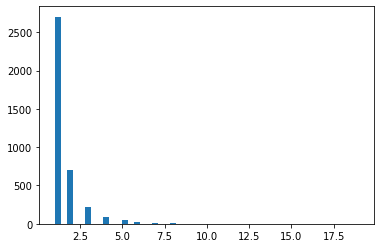

In [571]:
page_8_is_call = page_8.loc[(key for key in session_keys_is_call if key in index_page_8)].to_numpy()

page_8_is_call_zero = np.array([0 for key in session_keys_is_call if not key in index_page_8])

t = np.zeros(len(page_8_is_call) + len(page_8_is_call_zero))

t[:len(page_8_is_call)] = page_8_is_call

t[len(page_8_is_call):] = -10

page_8_is_call = t

page_8_is_call = page_8_is_call[(page_8_is_call < 20) & (page_8_is_call > 0)]

_,_,fig = plt.hist(page_8_is_call, bins = 50)

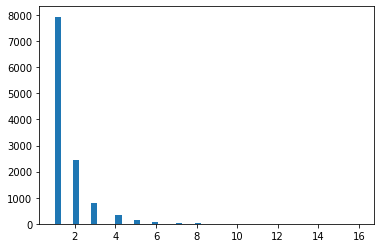

In [572]:
page_8_not_call = page_8.loc[(key for key in session_keys_not_call if key in index_page_8)]

page_8_not_call_zero = np.array([0 for key in session_keys_not_call if not key in index_page_8])

t = np.zeros(len(page_8_not_call) + len(page_8_not_call_zero))

t[:len(page_8_not_call)] = page_8_not_call

t[len(page_8_not_call):] = -10

page_8_not_call = t

page_8_not_call = page_8_not_call[(page_8_not_call < 20) & (page_8_not_call > 0) ]
_,_,fig = plt.hist(page_8_not_call, bins = 50)

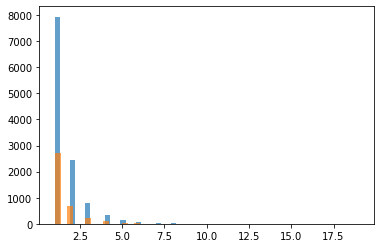

In [573]:
_,_,fig = plt.hist(page_8_not_call, bins = 50, density = 0, alpha = 0.7)
_,_,fig = plt.hist(page_8_is_call, bins = 50,  density = 0, alpha = 0.7)

In [682]:
sum_time = webstat.groupby('sessionkey_id')['pageview_duration_sec'].sum()
sum_time_index = set(sum_time.index)

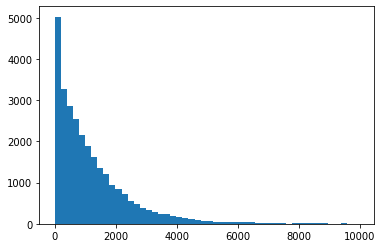

In [766]:
sum_time_8_is_call = sum_time.loc[session_keys_is_call]

sum_time_8_is_call = sum_time_8_is_call[(sum_time_8_is_call < 10000) & (sum_time_8_is_call > 0)]

_,_,fig = plt.hist(sum_time_8_is_call, bins = 50)

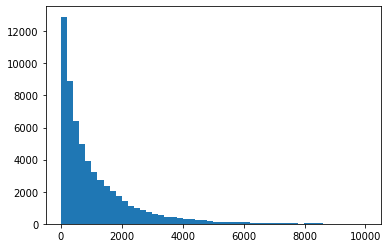

In [767]:
sum_time_8_not_call = sum_time.loc[session_keys_not_call]

sum_time_8_not_call = sum_time_8_not_call[sum_time_8_not_call  < 10000]


_,_,fig = plt.hist(sum_time_8_not_call, bins = 50)

<AxesSubplot:>

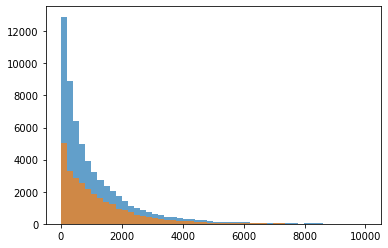

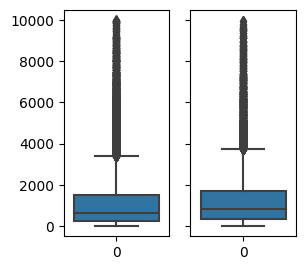

In [768]:
_,_,fig = plt.hist(sum_time_8_not_call, bins = 50, density = 0, alpha = 0.7)
_,_,fig = plt.hist(sum_time_8_is_call, bins = 50,  density = 0, alpha = 0.7)

f, axes = plt.subplots(1, 2,sharey=True, dpi = 100, figsize = (3,3))
sns.boxplot(data = sum_time_8_not_call.values, ax=axes[0])
sns.boxplot(data = sum_time_8_is_call.values, ax=axes[1])

In [769]:
avg_time = webstat.groupby('sessionkey_id')['price'].mean()

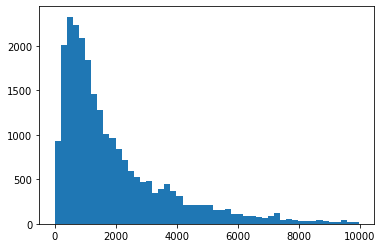

In [765]:
avg_time_8_is_call = avg_time.loc[session_keys_is_call]

avg_time_8_is_call = avg_time_8_is_call[(avg_time_8_is_call < 10000) & (avg_time_8_is_call > 0)]

_,_,fig = plt.hist(avg_time_8_is_call, bins = 50)

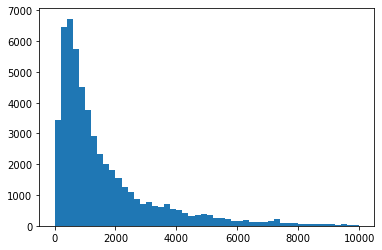

In [738]:
avg_time_8_not_call = avg_time.loc[session_keys_not_call]

avg_time_8_not_call = avg_time_8_not_call[(avg_time_8_not_call < 10000)]

_,_,fig = plt.hist(avg_time_8_not_call, bins = 50)

Ttest_indResult(statistic=-24.140823431529984, pvalue=6.32640243259517e-128)

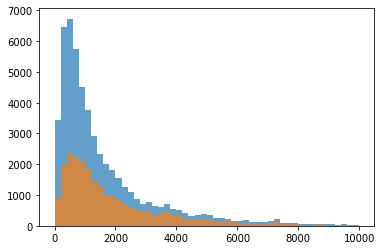

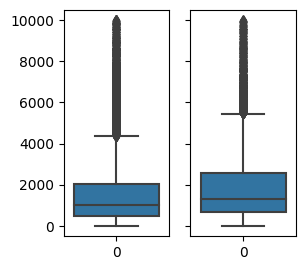

In [741]:
_,_,fig = plt.hist(avg_time_8_not_call, bins = 50, density = 0, alpha = 0.7)
_,_,fig = plt.hist(avg_time_8_is_call, bins = 50,  density = 0, alpha = 0.7)

f, axes = plt.subplots(1, 2,sharey=True, dpi = 100, figsize = (3,3))
sns.boxplot(data = avg_time_8_not_call.values, ax=axes[0])
sns.boxplot(data = avg_time_8_is_call.values, ax=axes[1])
stats.ttest_ind(avg_time_8_not_call.values,
                avg_time_8_is_call.values, equal_var=False )

In [1028]:
avg_create_time = train.groupby('sessionkey_id')['create_time'].mean()
avg_bool = train.groupby('sessionkey_id')['is_callcenter'].mean().astype(bool)

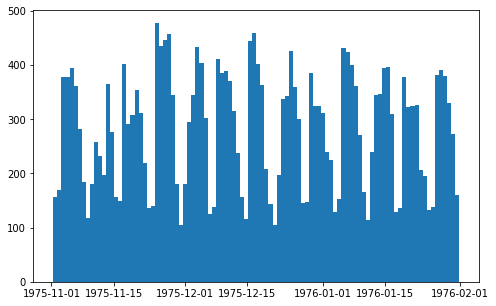

In [1029]:
avg_c_time_is_call = avg_create_time.loc[avg_bool]
plt.figure(figsize = (8,5))
_,_,fig = plt.hist(avg_c_time_is_call, bins = 100)

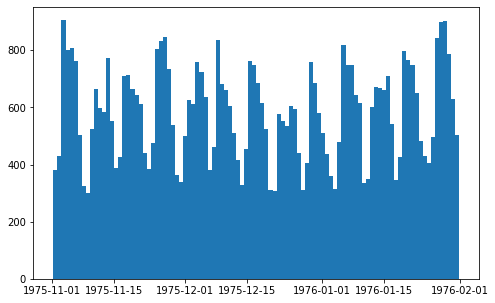

In [1030]:
avg_c_time_not_call = avg_create_time.loc[~avg_bool]
plt.figure(figsize = (8,5))
_,_,fig = plt.hist(avg_c_time_not_call, bins = 100)

datetime64[ns]


Ttest_indResult(statistic=-5.205146668586934, pvalue=1.945210429936376e-07)

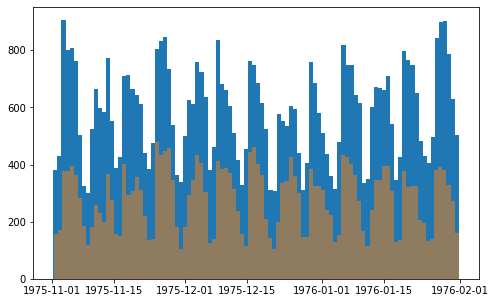

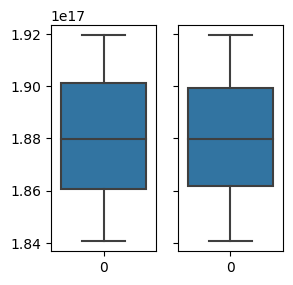

In [1061]:
plt.figure(figsize = (8,5))
_,_,fig = plt.hist(avg_c_time_not_call, bins = 100, density = 0, alpha = 1)
_,_,fig = plt.hist(avg_c_time_is_call, bins = 100,  density = 0, alpha = 0.5)
print(avg_c_time_not_call.dtype)
f, axes = plt.subplots(1, 2,sharey=True, dpi = 100, figsize = (3,3))
sns.boxplot(data = avg_c_time_not_call.values, ax=axes[0])
sns.boxplot(data = avg_c_time_is_call.values, ax=axes[1])
stats.ttest_ind(avg_c_time_not_call.dt.day + avg_c_time_not_call.dt.month * 30 ,
                avg_c_time_is_call.dt.day + avg_c_time_is_call.dt.month * 30, 
                equal_var=False )

In [966]:
avg_time = webstat.groupby('sessionkey_id')['date_time'].max()
avg_time_is_call = avg_time.loc[session_keys_is_call]
avg_time_not_call = avg_time.loc[session_keys_not_call]

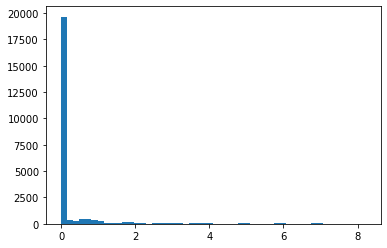

In [991]:
avg_diff_is_call =( #(avg_c_time_is_call - avg_time_is_call).astype('timedelta64[D]').astype('float') +
                  #(avg_c_time_is_call - avg_time_is_call).astype('timedelta64[h]').astype('float') / 24
                   (avg_c_time_is_call - avg_time_is_call).astype('timedelta64[s]').astype('float') / (24 * 60 * 60) 
                 #-(avg_c_time_is_call - avg_time_is_call).astype('timedelta64[s]').astype('float') / (24 * 60 * 60) //1
                  )
avg_diff_is_call = avg_diff_is_call[(avg_diff_is_call > 0) & (avg_diff_is_call < 10)]
_,_,fig = plt.hist(avg_diff_is_call, bins = 50)

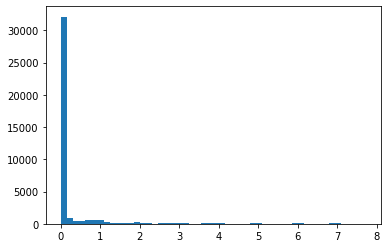

In [994]:
avg_diff_not_call = (#(avg_c_time_not_call - avg_time_not_call).astype('timedelta64[D]').astype('float') +
                     #(avg_c_time_not_call - avg_time_not_call).astype('timedelta64[h]').astype('float')/24 
                     (avg_c_time_not_call - avg_time_not_call).astype('timedelta64[s]').astype('float')/(24*60*60)
                    #-(avg_c_time_not_call - avg_time_not_call).astype('timedelta64[s]').astype('float')/(24*60*60) // 1
                    )
avg_diff_not_call = avg_diff_not_call[(avg_diff_not_call > 0 ) & (avg_diff_not_call < 10)]
_,_,fig = plt.hist(avg_diff_not_call, bins = 50)

Ttest_indResult(statistic=4.523989267798557, pvalue=6.081546296351148e-06)

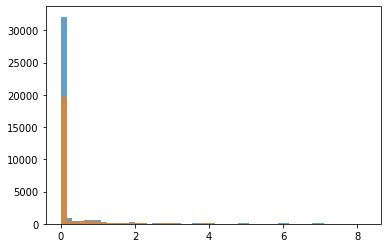

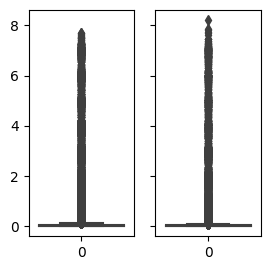

In [995]:
_,_,fig = plt.hist(avg_diff_not_call, bins = 50, density = 0, alpha = 0.7)
_,_,fig = plt.hist(avg_diff_is_call, bins = 50,  density = 0, alpha = 0.7)

f, axes = plt.subplots(1, 2,sharey=True, dpi = 100, figsize = (3,3))
sns.boxplot(data = avg_diff_not_call.values, ax=axes[0])
sns.boxplot(data = avg_diff_is_call.values, ax=axes[1])
stats.ttest_ind(avg_diff_not_call.values,
                avg_diff_is_call.values, equal_var=False )

In [958]:
avg_bool = train.groupby('sessionkey_id')['is_callcenter'].mean().astype(bool)
avg_mod = train.groupby('sessionkey_id')['is_moderated'].max().astype(bool)

In [965]:
len(avg_bool[avg_bool == avg_mod]),len(avg_bool[avg_bool != avg_mod])

(30289, 56411)

In [1046]:
avg_bool = train.groupby('sessionkey_id')['is_callcenter'].mean().astype(bool)
avg_pics = train.groupby('sessionkey_id')['goods_qty'].mean()

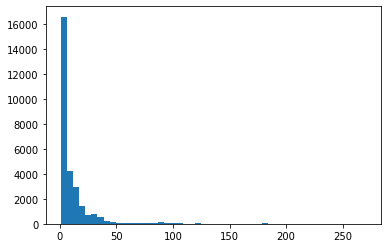

In [1047]:
avg_pics_is_call = avg_pics.loc[avg_bool]

_,_,fig = plt.hist(avg_pics_is_call, bins = 50)

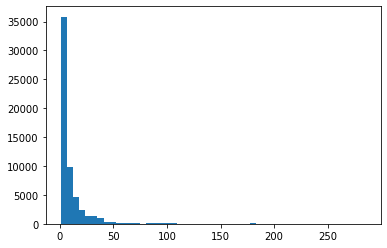

In [1048]:
avg_pics_not_call = avg_pics.loc[~avg_bool]

_,_,fig = plt.hist(avg_pics_not_call, bins = 50)

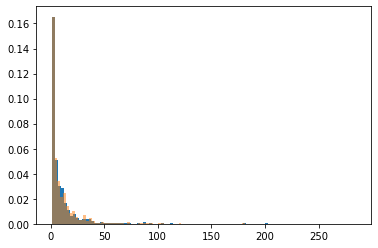

In [1049]:
_,_,fig = plt.hist(avg_pics_not_call, alpha =1, bins = 100,density = True)
_,_,fig = plt.hist(avg_pics_is_call, alpha = 0.5, bins = 100, density = True)

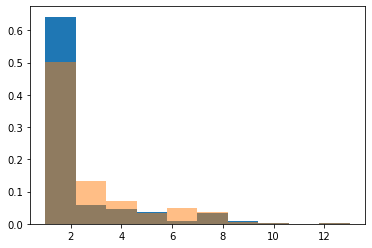

In [863]:
_,_,fig = plt.hist(key_pages.loc[session_keys_is_call], alpha =1, density = True)
_,_,fig = plt.hist(key_pages.loc[session_keys_not_call], alpha = 0.5, density = True)